# Time series is still not "solved"

On the most "ubiquitously cited" tasks, as image classification, with the advent of Deep Learning, we see steady progress.

<img src="http://drive.google.com/uc?export=view&id=1oloHhvznr2jpx5XwBieCCbI9FyLIl_nK" width=65%>


[source](https://www.researchgate.net/publication/356083410_A_Survey_on_Green_Deep_Learning)

On the other hand, from business perspective more prevalent task of time series forecasting receives comparatively less attention and progress is definitely more difficult to follow. This comes partly from the fact, that the variety of time series is presumably large, in many cases solving one forecasting problem has nothing to say about another one (or one might think so - and we will argue otherwise), and partly from the fact, that the most prestiguous benchmar in the field, the [M competition](https://forecasters.org/resources/time-series-data/) is organized more rarely and it's successive installments do not really lend themselves to easy comparison.

That seaid, the introduction of RNN/LSTM models represented a step in the time series prediction domain. None the less, the need for advancements in multiple areas remained, since models could be enhanced with respect to:

- interpretability
- confidence intervals (see eg.: [DeepAR](https://arxiv.org/abs/1704.04110))
- multi step forecasting
- __better accuracy__ and most importantly
- __transfer learning__

In our current discussion, we mainly focus on this latter two points.

## Competitive results

Even though RNN/LSTM based models could produce strong results in certain domains of time series modeling, and came with the added benefit of deep representations (like handling of different length timeseries, seq2seq scenarios, fixed length representation abilities and __potential transferability__), their __practical performance was often case not dominantly better than classical__, eg. autoregressive models, especially eg. Facebook's [Prophet](https://facebook.github.io/prophet/) or even [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average).

The main "measuring rod" for model performance in time series modeling, the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) showed, that hybrid approaches __combining classical models with LSTMs__ can be pretty competitive solutions, so the next era can be described by these kind of approaches.

## An example of hybrid models: ES-LSTM

<a href="http://drive.google.com/uc?export=view&id=1YHhnPMLvLdRMZCTgADbO_zlXWdFVx0w6"><img src="https://drive.google.com/uc?export=view&id=1OSM9XKUAw10hj-STVKBYfF4Zbyw10MzC" width=55%></a>

Source: [M4 Forecasting Competition: Introducing a New Hybrid ES-RNN Model](https://eng.uber.com/m4-forecasting-competition/)

Though there are many technicalities worth studying in detail, the main intuition behind this model is to replace the linear trend assumption in the Holt-Winters Exponential Smoothing model to accommodate more complex, "non linear trend" in the form of LSTMs, and keeping the ability of ES models to describe the "level" and "seasonal" components in the traditional way.

There is also a newer, multivariate extension of ES-RNN calles [MES-RNN](https://arxiv.org/abs/2112.08618) available.

<img src="http://drive.google.com/uc?export=view&id=1Oi0vbv4_G96Vy3LetxdgFWmFZcg8Em2A" width=65%>

# Do transformers come to time series?

We already know, that attention based architectures, "transformers" caused a revolution in the NLP domain, and are increasingly present also in the computer vision domain (eg. in form of [hybrid attention / convolution solutions](https://arxiv.org/abs/2106.04803), representing the state of the art on imagenet as of September 2021). The question naturally arises, if transformers can be of benefit also in the time series domain?

## Potential benefits

Isaac Godfried summarizes the potential benefits of transformers in the time series domain in his [short talk](https://www.youtube.com/watch?v=zteRgsiWcxI&t=225s) quite nicely:

<a href="http://drive.google.com/uc?export=view&id=1IHH9b4dZlJonuYN1_7OElWYRH_Mzia97"><img src="https://drive.google.com/uc?export=view&id=19n538WWN0ionGDYYBb8z4ZDpLBlzdIpw" width=45%></a>

Also worth mentioning, that the potential performance enhancements in large scale training are also promising. 

## Theoretical motivation

As a theoretical motivation for the possible extra performance of the attention based models comes from the fact, that they offer a different paradigm for discovering the temporal relationships between different points in the timeseries, namely:

- __Convolutions__ are presupposing, that there is a kind of __local relationship__ between the time points (which can be made more proper with "causal convolutions" and more wide with "dilated convolutions"), none the less, the basic assumption remains fairly local.

<a href="https://storage.googleapis.com/deepmind-live-cms/documents/BlogPost-Fig2-Anim-160908-r01.gif"><img src="https://drive.google.com/uc?export=view&id=1VadvwmhZ1--Wx6O1JR2G30anydCdk-mc" width=45%></a>

- __RNN/LSTM models__ though have the potential for long term memory, but have the drawback not just of __sequential computation__ but also tha __challenge of "dragging the information" through many timesteps__. There is no easy possibility for an LSTM to pay direct, local attention to a distant timestep by "jumping over" all the steps inbetween.

<a href="https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif"><img src="https://drive.google.com/uc?export=view&id=1Np87UUp-5YD_34LyG0Z-sO-OyCShaDcv" width=45%></a>

The attention based solutions promise to enable just that: the possibility to attend to any point in time (inside the processing window, that is), diractly and parallelizably.

<img src="http://drive.google.com/uc?export=view&id=1xM_y7bGSQ7YkT7kFgev26fwuShWb0fVO" width=65%>

[source](https://paperswithcode.com/paper/self-attention-for-raw-optical-satellite-time)

## Why not just slap a transformer on it?

Though it may sound very tempting to just take an "out of the box" implementation of transformers and apply it to a given time series, there are multiple drawbacks that have to be addressed before one can expect good results.

As outlined in the paper [Enhancing the Locality and Breaking the Memory Bottleneck of Transformer on Time Series Forecasting](https://arxiv.org/abs/1907.00235) there are potentially two main drawbacks for "vanila" transformers in TS omain that have to be mitigated:

1. Locality insensitivity
2. Quadratic dependence bottleneck

### Locality insensitivity problem

It is important to observe, that even in case of NLP transformers, the attention mechanisms were completely position agnostic, hence additional information had to be supplied ti the model to "mark" the position of given elements in a sequence. In the NLP case some [positional encoding](https://towardsdatascience.com/master-positional-encoding-part-i-63c05d90a0c3) had to be utilized in the form of multiplication with the input embeddings.

<a href="https://www.researchgate.net/publication/327068570/figure/fig3/AS:660457148928000@1534476663109/The-original-positional-encoding-used-in-Attention-Is-All-You-Need-VSP-17-composed.png"><img src="https://drive.google.com/uc?export=view&id=13PZAH1REUi3hImSY6O-8RYoQf8PYlKco" width=45%></a>

Notably, the inputs in the case of NLP were complex embedding vectors themselves, but in case of time series, they are typically just scalars (per input time series, which in case of multivariate modeling naturally forms vectors), which are by no means embeddings.

One of the avenues one can take here is to utilize some form of sinusoidal [time encoding](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/). Though not totally clear that only adding these encodings as additional features (as if they were additional time series inputs for the models) is sufficient, and also if how their exact periodicity should be set up.

Fort he latter problem, something like [time2vec](https://arxiv.org/abs/1907.05321) embedding, that are learnable time encodings can be of service.

<a href="http://drive.google.com/uc?export=view&id=1SgFlwYAYbdYweSNb4T08-DbVO1_vljmK"><img src="https://drive.google.com/uc?export=view&id=1UUchz4WivadH4aFiwmK-UX1DdUgcU2VW" width=30%></a>

In case of the ["Enhancing locality..."](https://arxiv.org/abs/1907.00235) paper they give a different interpretation of the locality problem, namely: they would like to enhance the model's ability to incorporate information from the sorrounding timepoints, or more specifically the recent past of a given timestep during the generation of query and key vectors in attention. They achieve this by introducing some locality assumptions in form of causal convolutions. More on this below.

### Quadratic dependence problem

In it's basic form, self attention is having a __quadratic complexity with respect to sequence length__, that is, if the input sequence becomes large enough, the application of classical attention layers becomes simple infeasible.

The proposed solution of the authors is [LogSparse Transformer](https://arxiv.org/abs/1907.00235), which is basically a strategy to balance the need for a wide enough input window and a reasonable amount of computation. The paper achieves it by a kind of sampling strategy, in which the immediate past for the current prediction horizon is accessible in it's completeness, and the more distant past is subsampled in tricky ways to keep the balance.

<a href="https://user-images.githubusercontent.com/42165262/75024151-50998c80-54dc-11ea-911d-8405b00bb8a7.png"><img src="https://drive.google.com/uc?export=view&id=1eIxZ49q7My0fL-4elIDdVFjUj5o3m3IU" width=65%></a>

## Is this the end?

Certainly not. Hybridization, as observed already in case of computer vision continues in the TS domain, namely a convolutional - attentional hybrid approach has been proposed in the work [Enhancing the Locality and Breaking the Memory Bottleneck of Transformer on Time Series Forecasting](https://arxiv.org/abs/1907.00235).

<a href="https://miro.medium.com/max/1214/1*YBbULIOPnECwvW7fy9NK7A.png"><img src="https://drive.google.com/uc?export=view&id=1TAP366xiVO54xYFt7uTmXkkE6i9gfUab" width=45%></a>

"We propose convolutional self attention mechanism by employing causal convolutions to produce queries and keys in the self attention layer. Query-key matching aware of local context, e.g. shapes, can help the model achieve lower training error and further improve its forecasting accuracy."

It can be assumed, that further hybrid models will appear.

More details and overview can be found [here](https://towardsdatascience.com/attention-for-time-series-classification-and-forecasting-261723e0006d).

# Full connections strike back end-to-end!

Though one of the important trends pointed out by the M4 competition (and Makridakis himself, the "M" in the competition's name) was the hybridization of deep learning and classical tools, followed by other tries to bring the transformer revolution to the field, some "rebels" opted to design a generic, end-to-end, time series specific arhitecture with no classical models or attention blocks involved.

The paper ["N-BEATS: Neural basis expansion analysis for interpretable time series forecasting"](https://arxiv.org/abs/1905.10437) proposes an architecture
- inspired by classical time series decomposition techniques
- containing only fully connected layers (with traditional linear or ReLU activations)
- potentially having interpretability enhancing modifications
- having generally high performance 

For this discussion we follow the lead of [this](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb) excellent reproduction of the paper.

## General architecture:

The general structure of the full architecture is as follows:

<img src="http://drive.google.com/uc?export=view&id=1SaasyDMrv5rmeaQFEXsG-pT-dVPoUHWc" width=55%>

## The setup

From the data perspective, the general setup is pretty traditional: we take an input window worth of historic data, and we are trying to predict a forward looking horizon.

<img src="http://drive.google.com/uc?export=view&id=1mhsSq4qR8--FCXP3XcNQ5kwSuOk2XK7_" width=45%>

Please observe, that the optput can not just be a single point in time, but it can be a vector representing arbitrary many timepoints into the future.

## Single Block

The difference in approach from previous solutions is, that the smallest unit of the whole architecture, the "block" is not just trying to generate a prediction about the future horizon __"forecast"__, but also some estimation / representation of the input window itself, a so called __"backcast"__. 

<img src="http://drive.google.com/uc?export=view&id=1_YPSYvSG5xAELUSX4B2qgvR1OM_qwLo3" width=20%>

This is achieved by having some (in the main implementation 4) __fully connected neural layers__ (originally with ReLU activations) generating some "theta" parameter layer, which is then used in two ways: 
1. One linear activation FC layer projects the layer's output to become the "forecast"
2. Another, independent FC layer does the projection for the "backcast"

This is so far nearly standard. The real gist of the solution lies in the usage of these blocks in "stacks".

## The stack

<img src="http://drive.google.com/uc?export=view&id=1HyvlrWBTsiIOgV86IE6B3DsJRuycQjI6" width=20%>

As demonstrated on the image above, the individual predictions, so the "forecasts" and "backcasts" from the blocks are handled differently.

1. The role of the forecast is to __additively__ contribute to the full stack forecast (as in: adding together tome series components, like trend, seasonality, patterns,...)
2. The role of the "backcast" is to __substractively__ remove the given components (trends, seasonalities, patterns,. etc.) from the input for a next layer of blocks.

This can be considered the first kind of "residual network" behavior of the model.

## Multi stack

Finally, the layering of stacks - on the input side, doing residual substraction, on the forecast side doing cumulative addition -  completes the whole model.

<img src="http://drive.google.com/uc?export=view&id=1brqZOsGKk0GsATvycIIXBBjd2eyCA0_c" width=20%>

## Added tricks

- Ensambling: For the final performance on competition data, unsurprisingly an ensamble of NBEATS models is created. This has dual purpose:
    - Better accuracy
    - Potential to easily do some confidence estimates based on a distribution of model outputs
- Replacing the activation function of certain blocks to trend detecting (linear) and season detecting (sinusoidal) activations, thus enhancing model interpretability in the original spirit of time series decomposition

## A variant for longer horizons: N-HiTS

Thöough very similar in the general concept, a new variant of N-BEATS named [N-HiTS](https://arxiv.org/pdf/2201.12886.pdf) emerged recently as a refinement and adaptation especially for long horizon forecasting.

The general picture is basically the same.

<img src="http://drive.google.com/uc?export=view&id=1peT8L_rVkrHXzcDLb_THFbHWbOHogX3u" width=65%>

Though there are two specific differences worth noting:

<img src="http://drive.google.com/uc?export=view&id=120qabPkKsq_XWhQ3fku6SJF7DYmt3RQi" width=15%>

1. The addition of a $MaxPool$ layer into the blocks, that in the words of the authors:

"At the input to each block ℓ, we propose to use a MaxPool layer with kernel size $k_{ℓ}$ to help it focus on analyzing compo- nents of its input with a specific scale. Larger $k_{ℓ}$ will tend to cut more high-frequency/small-time-scale components from the input of the MLP, forcing the block to focus on analyzing large scale/low frequency content. We call this multi-rate signal sampling, referring to the fact that the MLP in each block faces a different effective input signal sampling rate. Intuitively, this helps the blocks with larger pooling kernel size $k_{ℓ}$ focus on analyzing large scale components critical for producing consistent long-horizon forecasts."

2. Addition of an interpolation mechanism in the generation of fore and backcasts, that serves as a performance enhancer, since it enables the model to keep the number of parameters reasonably low even in the case of a longer term forecast. Contrast this to the fact that Transformers in their default case scale quadratically with respect to input lengts, but even the advanced versions of them, as well as the N-BEATS model is constrained by needing as many output nodes as timesteps in the forecast. The interpolation method in N-HiTS effectively mitigates that.

This - beyond the pure computational advantages - offers benefits in the smoothness, thus, the robustness of predictions:

<img src="http://drive.google.com/uc?export=view&id=10Dl4tqWySHLa4juwa3AbAr_wVWmrr9Gs" width=45%>

# Summary of architectural approaches

With considerable amount of handwaving, one can argue, that even in case of the newly proposed neural architectures, some classical intuitions remain, thus one can in a sense treat the big approaches to neural model building as "analogons" of the "good old" techniques in the sense, that they represent specific inductive biases capitalizing on one or the other properties of time series.

| Intuition  |  Non-neural model class |  Neural "analogue" examples|
|---|---|---|
|  Local/neighbouring influence / short term memory | Wavelets  | ConvNet / TCN  |   
|  Cumulativity / smoothing / longer term "blurry" influence | ExponentialSmoothing   | LSTM variants |   
|  Pointwise distant influence |  tree based regression models  | Attention / Transformer |   
|  Composability from (continuous) "shapes" |  "decomposition methods"  |  N-BEATS/HiTS |   


There are also bodies of work in applying explicit Fourier transform based neural methods see eg. [here](https://arxiv.org/pdf/2109.13090.pdf) and ordinary differential equation based neural models see eg. [here](https://arxiv.org/pdf/2010.00951.pdf).

# Transfer learning in time series

Generally, one could reasonably argue, that the main innovation of Deep Learning is the representation ability of the models, that learns useful "embeddings" of the data over and beyond the strict confines of a given dataset, or even a given domain. It is by no surprise, that Ian Goodfellow in his famouis venn diagram puts Deep Learing squarely into the representation learning category.

<img src="http://drive.google.com/uc?export=view&id=1Z8p7XZZTV3zOIsYlmLrggoAs0Ach_hDt" width=35%>

In case of visual, audio and NLP tasks the dominance of transfer learning - that is, the pre-training on large scale domain independent data, then finetuning (or even just "prompt engineering") the model is asolute. It is arguably the essence of the success.

But how about transfer learning in time series?

Though we could speak about __domain adaptation__ AND task adaptation in case of transfer learning, we restrict ourselves to the former, so where the data is different, the task itself, in the simplest case forecasting is the same. 

## Gaining traction

In their work [Transfer Learning With Time Series Data A Systematic Mapping Study](https://www.researchgate.net/publication/356945141_Transfer_Learning_With_Time_Series_Data_A_Systematic_Mapping_Study) the authors collect over 200 papers that talk about transfer learning in this field up until January 2021 (hence the funny data at the last bar).

<img src="http://drive.google.com/uc?export=view&id=1vMAIoeBCoXNzaeuqgr-rl7wnQvsaNUjh" width=45%>

It is visible, that this field is gaining considerable traction!

Interestingly, in case of a more fine grained categorization of tasks the authors find, that time series classification dominates, maybe pointing toward the difficulty or (more likely) underutilization of the transfer learning approach to forecasting problems.

<img src="http://drive.google.com/uc?export=view&id=1dGRNVt1ab22VtB0ynh1jI9ny-_nV-IJV" width=45%>

## Challenges in time series transfer learning

### 1. What hierarchy?

As [this](https://towardsdatascience.com/transfer-learning-for-time-series-forecasting-51f023bc159c) wonderful article of Isaac Godfried argues, __what features to transfer__, or more specificly __what feature hierarchy to learn__ is not a simple task in case of time series. Or as the author puts it:

"In computer vision transfer learning generally works as the model learns in a hierarchical fashion; ...  in NLP ...  The transformer architecture in particular functioned well for transfer learning.  with time series it is harder to find a useful hierarchy or set of intermediate representations that generalize across to different problems. __We do have certain components that people traditionally decompose time series into such as seasonality, trend and remainder. However, developing a model that effectively learns intermediate decoupled representations of these remains elusive.__ The authors of “Reconstruction and Regression Loss for Time-Series Transfer Learning” explore creating a specialized loss function that helps to facilitate positive transfer through a decoupling process."

In our view, this kind of decomposition - the natural hierarchy for time series features - is a promising avenue to go, and might hint at the application of [NBEATS](https://arxiv.org/abs/1905.10437) like models.

#### Sidenote: different magnitudes

A subproblem of the input differences arises from the fact, that the numeric magnitudes of timeseries differ. To circumvent this limitation, one proposal is to re-cast the original regression problem to an __ordinal regression__ task, where all the timeseries are discretized with an adaptive discretization into a fixed number of "bins", thus basically reducing the problem to predicting the next "bin" or by analogy "word" - if we follow the intuition of the authors pointing out the parallels with NLP:

<img src="http://drive.google.com/uc?export=view&id=1tnmY_15y1Gn4Elo35-mZiBcchwGMDuwM" width=45%>

Source: [Zero-shot and few-shot time series forecasting with ordinal regression recurrent neural networks](https://www.esann.org/sites/default/files/proceedings/2020/ES2020-71.pdf)

Though the authors stick to an LSTM based seq2seq approach, nothing prevents us from aplpying more recent models the same way, so this can be an interesting avenue for further investigation.

### 2. What inputs?

Moreover, the Godfried points out:

"A second challenge with multivariate time series forecasting is that many times the problems have a different number of feature time series. 

In our experiments we have generally found using a model specific initial “embedding_layer” helpful then having transferable middle layers."

So some care has to be taken in case os multivariate time series, but this does not seem to be a showstopper in itself.

### 3. What source to transfer from?

Even in case of "classical" domains of machine learning it is a widesprad observation, that the similarity between source and target datasets considered for transfer learning constrain the possible amount of performance gain: __the more closely source and target are related, the more gains can be had__.
    
It is absolutely not unreasonable to assume that this is a case in time series data also. 

None the less, the diversity of time series datasets can be considerable, measuring their relatedness is not a trivial task. Though the most proper way to measure similarity between time series data presupposes some kind of description / modeling already, so this can be a kind of vicious circle: if we understand a dataset, we can perfectly discover it's relations to other ones. Not wanting to make this to an infinite regress, the authors of the paper [Implementing transfer learning across different datasets for time
series forecasting](https://www.sciencedirect.com/science/article/abs/pii/S0031320320304209) suggest, that __more simple alignement and distance measures can be used to pre-select relevant time series for modeling.__ Namely: they propose to do [Dynamic Time Warping](https://en.wikipedia.org/wiki/Dynamic_time_warping) to align series, and then use [Jenssen-Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence) to calculate elatedness and choose sources for transfer. 

<img src="http://drive.google.com/uc?export=view&id=1vwQgvvBTFv7IEW0ltGcz_K3lSjibdU41" width=55%>

#### Sidenote of interest: 

In the aformentioned work the authors also utilize causal convnets as basis learners, as well as a joint training and representation alignment loss based approach to carry out the transfer. The second best behaving model is transfer learned TCN.

#### A more elaborate approach to "pairing"

As a more subtle observation, one could argue, that the mere "surface level" similarity of two time series (eg. their "time domain" distance based on some metric) is the most appropriate tool to judge the usefulness of a given source dataset in the transfer learning scenario in order to achiece the highest performance on the target dataset.

Some recent works, like ["A relationship-aligned transfer learning algorithm for time series forecasting"](https://www.sciencedirect.com/science/article/abs/pii/S0020025522001104) set out to tackle this uestion by searching for alignment / choice of suitable source time series __in the space of learned representations__.

<img src="http://drive.google.com/uc?export=view&id=1Fjb2cBcJHWz65xRCtYXKCnRqoN0ivvrZ" width=65%>

Let us go through the steps laid out in the paper:

__STEP 1.__

"Specifically, during the design and construction of the proposed RATL algorithm, 

__we firstly design 'a representation learning module.__

It is viewed as the encoder and is utilized to explore the underlying features of time series. In the source dataset 
selection phase, in order to measure whether a potential source dataset is in favor of the target task, an encoder trained based on this dataset is applied to the target task to produce the informative representations. Then, a simple linear layer is added to perform the prediction on basis of these representations. ... the prediction performance of the linear layer can also, to some extent, reflect the effectiveness of the representation learning 
module. The better the forecasting performance is, the more suitable the encoder will be to the target task."


__STEP 2.__

After the choice of the most suitable sources, a separate step for representation learning is initialized to get to the appropriate representation for the target dataset.

__STEP 3. and 4.__

Relationship aligned learning phase, the encoder module if frozen, and a triplet similarity based learning procedure is initialized to learn an alignment transformation between the source and target encoders's representations.

__STEP 5.__

Regression aligned learning phase one more layer of finetuning is acrried out to maximize the regression performance over the previous representations with respect to forecasting performance.

__STEP 6.__

Final target prediction is carried out.


Some results:

<img src="http://drive.google.com/uc?export=view&id=1qWBeq2-2Qe1PfVWVGOtaylP0Ji1Pkays" width=65%>

##### Observation

A really delicate and elaborate methodology has to be utilized to achieve an at best modest increase in predictive performance. 

## ...Some promising results in general

To quantify the potential of transfer learning in general, recently people started to more sytematically investigate the possible performance gains of transfer learning in time series forecasting domain, eg. in the work [Performance of Deep Learning models with transfer learning for multiple-step-ahead forecasts in monthly time series](https://arxiv.org/abs/2203.11196).

The authors find, that transfer learning enhanced neural models beat non-neural baselines as well as offer advantages against only target trained neural models:

<img src="http://drive.google.com/uc?export=view&id=1XS_-PmjmL9dF1hetYpa9_PXejLhY_9c1" width=55%>


It is worth noting, that this survey only includes "regular" convnets, LSTM-s and Temporal Convolution Networks, but no hybrid models, transformers or NBEATS derivatives.

None the less __there seems to be potential in time series transfer learning__, that is worth taking a look at!

Thus said, __one has the impression, that we are still waiting for a big breakthrough to come.__

# Epilogue

With all the innovation going on, this area of modeling is far from "settled". 

There is still considerable amount of well founded scepticism with regard to the dominance of deep learning techniques in the time series field, like in:

[Do we really need deep learning for TS](https://arxiv.org/abs/2101.0211)

It is thus still a question - albeit with some [positive results](https://arxiv.org/abs/2002.02887) if the "zero shot learning" paradigm, that came to dominate NLP will come to the time series domain.

Keep an eye out for disruptive changes!

## Additional resources

Good intro to some recent tools in time series modeling:

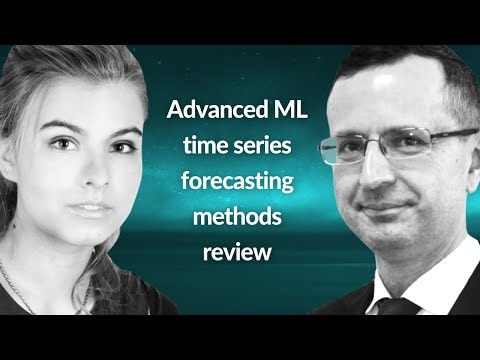

In [4]:
from IPython import display
display.YouTubeVideo(id="ng8i5KPf6d0")

Also very well worth studying:
- [Time Series Analysis and Modeling to Forecast: a Survey](https://arxiv.org/abs/2104.00164)
- [Transfer Learning With Time Series Data: A Systematic Mapping Study](https://www.researchgate.net/publication/356945141_Transfer_Learning_With_Time_Series_Data_A_Systematic_Mapping_Study)